In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
box_scores = pd.read_csv('./box19.csv')
purified_paces = pd.read_csv('./pace19.csv')
box_scores.head()

,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Suffix
0,Philadelphia 76ers,240,34,87,0.391,5,26,0.192,14,23,...,6,41,47,18,8,5,16,20,87,/boxscores/201810160BOS.html
1,Boston Celtics,240,42,97,0.433,11,37,0.297,10,14,...,12,43,55,21,7,5,14,20,105,/boxscores/201810160BOS.html
2,Oklahoma City Thunder,240,33,91,0.363,10,37,0.270,24,37,...,16,29,45,21,12,6,14,21,100,/boxscores/201810160GSW.html
3,Golden State Warriors,240,42,95,0.442,7,26,0.269,17,18,...,17,41,58,28,7,7,21,29,108,/boxscores/201810160GSW.html
4,Milwaukee Bucks,240,42,85,0.494,14,34,0.412,15,20,...,11,46,57,26,5,4,21,25,113,/boxscores/201810170CHO.html


First let's look at which teams play fast and which play slow

Text(0, 0.5, 'Poss/48 minutes')

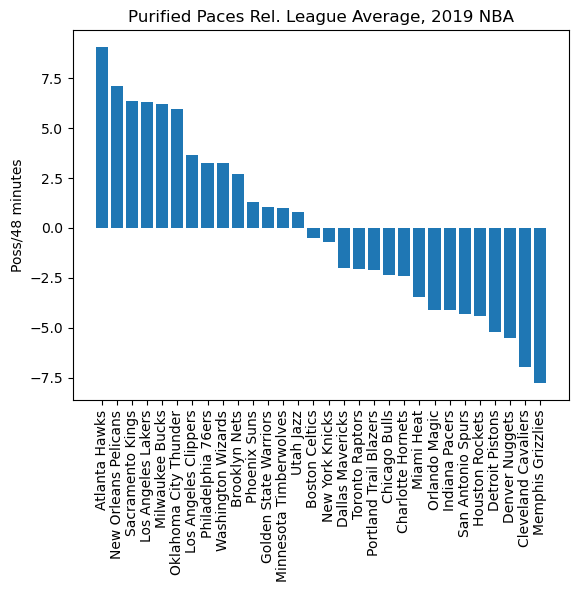

In [2]:
mean_pace = np.mean(purified_paces["Purified.Pace"])
paces_rel_mean = [purified_paces["Purified.Pace"][i]-mean_pace for i in range(30)]
plt.bar(purified_paces["Team"],paces_rel_mean)
ticks =plt.xticks(rotation=90)
plt.title('Purified Paces Rel. League Average, 2019 NBA')
plt.ylabel('Poss/48 minutes')

For each game, we'll compute the pace and see if the team that controlled the pace won. Every pair of consecutive rows is a "game".

In [3]:
box_scores.head()

,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Suffix
0,Philadelphia 76ers,240,34,87,0.391,5,26,0.192,14,23,...,6,41,47,18,8,5,16,20,87,/boxscores/201810160BOS.html
1,Boston Celtics,240,42,97,0.433,11,37,0.297,10,14,...,12,43,55,21,7,5,14,20,105,/boxscores/201810160BOS.html
2,Oklahoma City Thunder,240,33,91,0.363,10,37,0.270,24,37,...,16,29,45,21,12,6,14,21,100,/boxscores/201810160GSW.html
3,Golden State Warriors,240,42,95,0.442,7,26,0.269,17,18,...,17,41,58,28,7,7,21,29,108,/boxscores/201810160GSW.html
4,Milwaukee Bucks,240,42,85,0.494,14,34,0.412,15,20,...,11,46,57,26,5,4,21,25,113,/boxscores/201810170CHO.html


In [4]:
games = set(box_scores["Suffix"])
ngames = len(games)
controller_wins = [False for i in range(ngames)]
for i in range(ngames):
    poss1 = box_scores["FGA"][2*i]+0.44*box_scores["FTA"][2*i]-box_scores["ORB"][2*i]+box_scores["TOV"][2*i]
    poss2 = box_scores["FGA"][2*i+1]+0.44*box_scores["FTA"][2*i+1]-box_scores["ORB"][2*i+1]+box_scores["TOV"][2*i+1]
    game_pace = 48*(poss1+poss2)/(2*box_scores["MP"][2*i]/5)
    #retrieve each opponents' pace
    pace_team1 = purified_paces.loc[purified_paces["Team"]==box_scores["Team"][2*i],"Purified.Pace"].values[0]
    pace_team2 = purified_paces.loc[purified_paces["Team"]==box_scores["Team"][2*i+1],"Purified.Pace"].values[0]
    if(np.abs(pace_team1-game_pace)<np.abs(pace_team2-game_pace)):
        #Team 1 controlled the pace
        if(box_scores["PTS"][2*i]>box_scores["PTS"][2*i+1]):
            #Team 1 won
            controller_wins[i]=True
    else: 
        #Team 2 controlled the pace
        if(box_scores["PTS"][2*i]<box_scores["PTS"][2*i+1]):
            #Team 2 won
            controller_wins[i]=True
controller_win_pct = sum(1.0 for x in controller_wins if x)*100/ngames
print(controller_win_pct)

48.78048780487805


The same holds true if we use the more traditional pace measurement instead of our purified pace

In [5]:
simpler_controller_wins = [False for i in range(ngames)]
for i in range(ngames):
    poss1 = box_scores["FGA"][2*i]+0.44*box_scores["FTA"][2*i]-box_scores["ORB"][2*i]+box_scores["TOV"][2*i]
    poss2 = box_scores["FGA"][2*i+1]+0.44*box_scores["FTA"][2*i+1]-box_scores["ORB"][2*i+1]+box_scores["TOV"][2*i+1]
    game_pace = 48*(poss1+poss2)/(2*box_scores["MP"][2*i]/5)
    #Throw an error if the data is not in the expected format; consecutive rows the same game
    if(box_scores["Suffix"][2*i]!=box_scores["Suffix"][2*i+1]):
        raise Exception
    #retrieve each opponents' pace
    pace_team1 = purified_paces.loc[purified_paces["Team"]==box_scores["Team"][2*i],"Pace"].values[0]
    pace_team2 = purified_paces.loc[purified_paces["Team"]==box_scores["Team"][2*i+1],"Pace"].values[0]
    if(np.abs(pace_team1-game_pace)<np.abs(pace_team2-game_pace)):
        #Team 1 controlled the pace
        if(box_scores["PTS"][2*i]>box_scores["PTS"][2*i+1]):
            #Team 1 won
            simpler_controller_wins[i]=True
    else: 
        #Team 2 controlled the pace
        if(box_scores["PTS"][2*i]<box_scores["PTS"][2*i+1]):
            #Team 2 won
            simpler_controller_wins[i]=True
simpler_controller_win_pct = sum(1.0 for x in controller_wins if x)*100/ngames
print(simpler_controller_win_pct)

48.78048780487805


This data says that teams that control the pace actually lose more often than they win! But perhaps the effects are confounded by looking at the league as a whole. Let's pick out some teams who played either very fast or very slow to see if there is an effect. Let's pick out specifically the Hawks and Grizzlies and see how pace affected their margin of victory.

We can just slightly augment the old code to achieve this instead of writing entirely new (perhaps more efficient) lines!

Text(0.5, 1.0, 'Atlanta Pace v. Margin of Victory - Fastest Team')

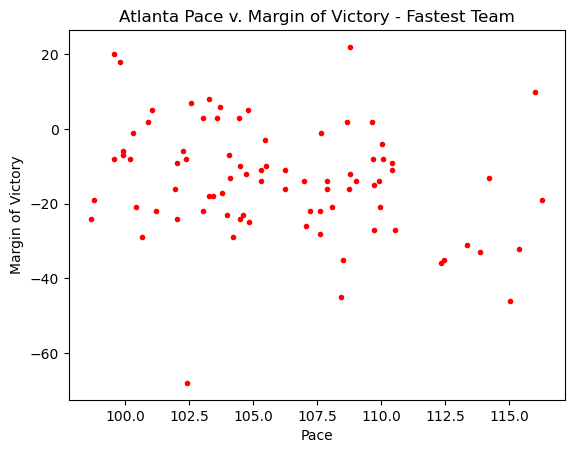

In [6]:
#pace of the ith memphis game
mem_pace = [0 for i in range(82)]
#memphis' marign of victory in their ith game
mem_mov = [0 for i in range(82)]
#counter for which memphis game we're on
mem_counter = 0

atl_pace = [0 for i in range(82)]
atl_mov = [0 for i in range(82)]
atl_counter = 0

for i in range(ngames):
    poss1 = box_scores["FGA"][2*i]+0.44*box_scores["FTA"][2*i]-box_scores["ORB"][2*i]+box_scores["TOV"][2*i]
    poss2 = box_scores["FGA"][2*i+1]+0.44*box_scores["FTA"][2*i+1]-box_scores["ORB"][2*i+1]+box_scores["TOV"][2*i+1]
    game_pace = 48*(poss1+poss2)/(2*box_scores["MP"][2*i]/5)
    #Throw an error if the data is not in the expected format; consecutive rows the same game
    if(box_scores["Suffix"][2*i]!=box_scores["Suffix"][2*i+1]):
        raise Exception
    #retrieve each opponents' pace
    pace_team1 = purified_paces.loc[purified_paces["Team"]==box_scores["Team"][2*i],"Pace"].values[0]
    pace_team2 = purified_paces.loc[purified_paces["Team"]==box_scores["Team"][2*i+1],"Pace"].values[0]
    if box_scores["Team"][2*i]=='Memphis Grizzlies':
        mem_pace[mem_counter] = game_pace
        mem_mov[mem_counter]= box_scores["PTS"][2*i]-box_scores["PTS"][2*i+1]
        mem_counter+=1
    if box_scores["Team"][2*i+1]=='Memphis Grizzlies':
        mem_pace[mem_counter] = game_pace
        mem_mov[mem_counter]=box_scores["PTS"][2*i+1]-box_scores["PTS"][2*i]
        mem_counter+=1
    if box_scores["Team"][2*i]=='Atlanta Hawks':
        atl_pace[atl_counter] = game_pace
        atl_mov[atl_counter]=box_scores["PTS"][2*i]-box_scores["PTS"][2*i+1]
        atl_counter+=1
    if box_scores["Team"][2*i+1]=='Atlanta Hawks':
        atl_pace[atl_counter] = game_pace
        atl_mov[atl_counter]=box_scores["PTS"][2*+1]-box_scores["PTS"][2*i]
        atl_counter+=1
plt.scatter(atl_pace,atl_mov,color='red',marker=".")
plt.xlabel('Pace')
plt.ylabel('Margin of Victory')
plt.title('Atlanta Pace v. Margin of Victory - Fastest Team')

Text(0.5, 1.0, 'Memphis Pace v. Margin of Victory - Slowest Team')

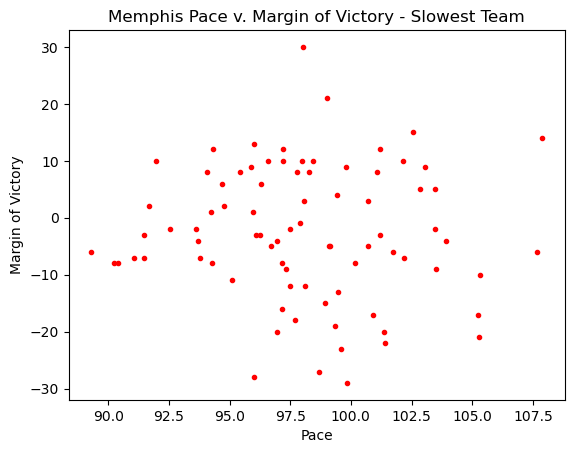

In [7]:
plt.scatter(mem_pace,mem_mov,color='red',marker=".")
plt.xlabel('Pace')
plt.ylabel('Margin of Victory')
plt.title('Memphis Pace v. Margin of Victory - Slowest Team')

Let's try this again with two more teams

Text(0.5, 1.0, 'Cleveland Pace v. Margin of Victory - 2nd Slowest Team')

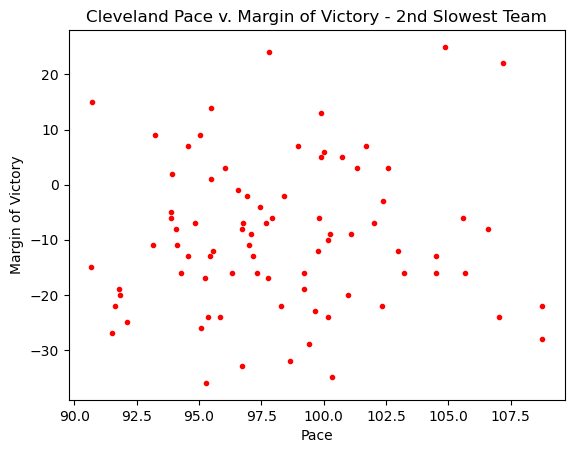

In [8]:
sac_pace = [0 for i in range(82)]
sac_mov = [0 for i in range(82)]
sac_counter = 0

cle_pace = [0 for i in range(82)]
cle_mov = [0 for i in range(82)]
cle_counter = 0

for i in range(ngames):
    poss1 = box_scores["FGA"][2*i]+0.44*box_scores["FTA"][2*i]-box_scores["ORB"][2*i]+box_scores["TOV"][2*i]
    poss2 = box_scores["FGA"][2*i+1]+0.44*box_scores["FTA"][2*i+1]-box_scores["ORB"][2*i+1]+box_scores["TOV"][2*i+1]
    game_pace = 48*(poss1+poss2)/(2*box_scores["MP"][2*i]/5)
    #Throw an error if the data is not in the expected format; consecutive rows the same game
    if(box_scores["Suffix"][2*i]!=box_scores["Suffix"][2*i+1]):
        raise Exception
    #retrieve each opponents' pace
    pace_team1 = purified_paces.loc[purified_paces["Team"]==box_scores["Team"][2*i],"Pace"].values[0]
    pace_team2 = purified_paces.loc[purified_paces["Team"]==box_scores["Team"][2*i+1],"Pace"].values[0]
    if box_scores["Team"][2*i]=='Cleveland Cavaliers':
        cle_pace[cle_counter] = game_pace
        cle_mov[cle_counter]= box_scores["PTS"][2*i]-box_scores["PTS"][2*i+1]
        cle_counter+=1
    if box_scores["Team"][2*i+1]=='Cleveland Cavaliers':
        cle_pace[cle_counter] = game_pace
        cle_mov[cle_counter]=box_scores["PTS"][2*i+1]-box_scores["PTS"][2*i]
        cle_counter+=1
    if box_scores["Team"][2*i]=='Sacramento Kings':
        sac_pace[sac_counter] = game_pace
        sac_mov[sac_counter]=box_scores["PTS"][2*i]-box_scores["PTS"][2*i+1]
        sac_counter+=1
    if box_scores["Team"][2*i+1]=='Sacramento Kings':
        sac_pace[sac_counter] = game_pace
        sac_mov[sac_counter]=box_scores["PTS"][2*+1]-box_scores["PTS"][2*i]
        sac_counter+=1
plt.scatter(cle_pace,cle_mov,color='red',marker=".")
plt.xlabel('Pace')
plt.ylabel('Margin of Victory')
plt.title('Cleveland Pace v. Margin of Victory - 2nd Slowest Team')

Text(0.5, 1.0, 'Sacramento Pace v. Margin of Victory - 3rd Fastest Team')

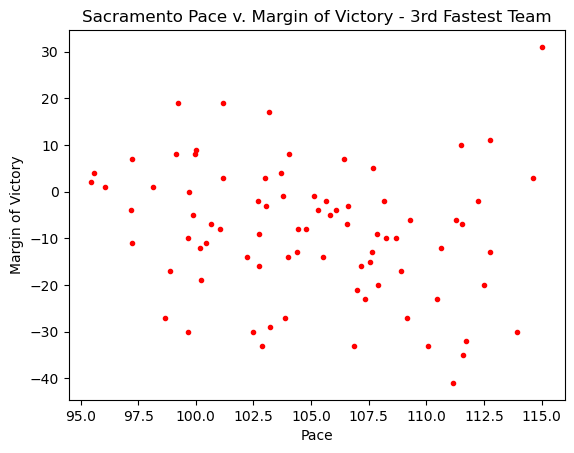

In [9]:
plt.scatter(sac_pace,sac_mov,color='red',marker=".")
plt.xlabel('Pace')
plt.ylabel('Margin of Victory')
plt.title('Sacramento Pace v. Margin of Victory - 3rd Fastest Team')

1312